In [ ]:
import numpy as np
from PIL import Image, ImageOps
import keras
from keras.datasets import mnist
from skimage.transform import resize

In [ ]:
# # Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Split the training set into a smaller training set and a validation set
val_size = int(len(x_train) * 0.2)
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]

In [ ]:
## Subsetting 20 percent of the data
subset_index = np.random.choice(len(x_train), size=int(len(x_train)*0.2), replace=False)
x_train_subset = x_train[subset_index]
y_train_subset = y_train[subset_index]

In [ ]:
import cv2
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [ ]:
def resize_image(images, labels):
    augmented_images = []
    augmented_labels = []
    for image, label in zip(images, labels):
        augmented_images.append(image_resize(image))
        augmented_labels.append(label)
    return np.array(augmented_images), np.array(augmented_labels)


def left_right_flip(images, labels):
    augmented_images = []
    augmented_labels = []
    for image, label in zip(images, labels):
        flipped_image = np.fliplr(image)
        augmented_images.append(flipped_image)
        augmented_labels.append(label)
    return np.array(augmented_images), np.array(augmented_labels)

def rotate(images, labels):
    cnt = 0
    augmented_images = []
    augmented_labels = []
    try:
        for image, label in zip(images, labels):
            # Rotate the image by any random degree between -30 and 30.
            angle = np.random.randint(-30, 30)
            rotated_image = Image.fromarray(image).rotate(angle)
            rotated_image = np.array(rotated_image)
            augmented_images.append(rotated_image)
            augmented_labels.append(label)
            cnt += 1
    except:
        print(cnt)
    return np.array(augmented_images), np.array(augmented_labels)

def add_gaussian_noise(images, labels):
    augmented_images = []
    augmented_labels = []
    for image, label in zip(images, labels):
        # Add random Gaussian noise to the image
        noise = np.random.normal(loc=0.0, scale=1.0, size=image.shape)
        noisy_image = np.clip((image + noise * 50), 0, 255).astype(np.uint8)
        augmented_images.append(noisy_image)
        augmented_labels.append(label)
    return np.array(augmented_images), np.array(augmented_labels)

In [ ]:
def best_model():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='sigmoid', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(20, kernel_size=(2, 2), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(50, activation='linear'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [ ]:
size = x_train_subset.shape[0]

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, add


### 1. Positional Augmentation: [2*5 = 10]
#### a. Resize your data. [2 marks]

In [ ]:
model = best_model()
tf.config.run_functions_eagerly(True)

In [ ]:
x_train_resize, y_train_resize = resize_image(x_train_subset, y_train_subset)

x_train_updated_1 = np.concatenate([x_train, x_train_resize.reshape((size, 28, 28))])
y_train_updated_1 = np.concatenate([y_train, y_train_resize])

history_1 = model.fit(x_train_updated_1, to_categorical(y_train_updated_1),
                 batch_size=128, epochs=10, validation_data = (x_val, to_categorical(y_val)))

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


450/450 [==============================] - 18s 35ms/step - loss: 0.8749 - accuracy: 0.7282 - val_loss: 0.2432 - val_accuracy: 0.9264
Epoch 2/10
450/450 [==============================] - 15s 34ms/step - loss: 0.1922 - accuracy: 0.9412 - val_loss: 0.1978 - val_accuracy: 0.9398
Epoch 3/10
450/450 [==============================] - 16s 36ms/step - loss: 0.1401 - accuracy: 0.9564 - val_loss: 0.1349 - val_accuracy: 0.9589
Epoch 4/10
450/450 [==============================] - 16s 36ms/step - loss: 0.1192 - accuracy: 0.9629 - val_loss: 0.1128 - val_accuracy: 0.9663
Epoch 5/10
450/450 [==============================] - 16s 35ms/step - loss: 0.1035 - accuracy: 0.9679 - val_loss: 0.1064 - val_accuracy: 0.9680
Epoch 6/10
450/450 [==============================] - 16s 34ms/step - loss: 0.0946 - accuracy: 0.9707 - val_loss: 0.1006 - val_accuracy: 0.9706
Epoch 7/10
450/450 [==============================] - 17s 38ms/step - loss: 0.0864 - accuracy: 0.9730 - val_loss: 0.0975 - val_accuracy: 0.9706
Epo

#### b. Left-right flip the original data. [2 marks]

In [ ]:
x_train_flip, y_train_flip = left_right_flip(x_train_subset, y_train_subset)

x_train_updated_2 = np.concatenate([x_train, x_train_flip.reshape((size, 28, 28))])
y_train_updated_2 = np.concatenate([y_train, y_train_flip])

history_2 = model.fit(x_train_updated_2, to_categorical(y_train_updated_2),
                 batch_size=128, epochs=10, validation_data = (x_val, to_categorical(y_val)))

Epoch 1/10
450/450 [==============================] - 17s 38ms/step - loss: 0.2562 - accuracy: 0.9262 - val_loss: 0.1347 - val_accuracy: 0.9597
Epoch 2/10
450/450 [==============================] - 16s 35ms/step - loss: 0.1801 - accuracy: 0.9427 - val_loss: 0.1356 - val_accuracy: 0.9600
Epoch 3/10
450/450 [==============================] - 16s 35ms/step - loss: 0.1643 - accuracy: 0.9483 - val_loss: 0.1174 - val_accuracy: 0.9647
Epoch 4/10
450/450 [==============================] - 16s 35ms/step - loss: 0.1550 - accuracy: 0.9503 - val_loss: 0.1158 - val_accuracy: 0.9647
Epoch 5/10
450/450 [==============================] - 16s 35ms/step - loss: 0.1463 - accuracy: 0.9525 - val_loss: 0.1275 - val_accuracy: 0.9579
Epoch 6/10
450/450 [==============================] - 16s 35ms/step - loss: 0.1396 - accuracy: 0.9546 - val_loss: 0.1120 - val_accuracy: 0.9659
Epoch 7/10
450/450 [==============================] - 15s 34ms/step - loss: 0.1343 - accuracy: 0.9569 - val_loss: 0.1094 - val_accuracy:

#### c. Rotate the original data by some degree. [2 marks]

In [ ]:
x_train_rotate, y_train_rotate = rotate(x_train_subset.reshape((size, 28, 28)), y_train_subset)

x_train_updated_3 = np.concatenate([x_train, x_train_rotate])
y_train_updated_3 = np.concatenate([y_train, y_train_rotate])

history_3 = model.fit(x_train_updated_3, to_categorical(y_train_updated_3),
                 batch_size=128, epochs=10, validation_data = (x_val, to_categorical(y_val)))

Epoch 1/10
450/450 [==============================] - 16s 36ms/step - loss: 0.0948 - accuracy: 0.9705 - val_loss: 0.0785 - val_accuracy: 0.9761
Epoch 2/10
450/450 [==============================] - 15s 34ms/step - loss: 0.0792 - accuracy: 0.9751 - val_loss: 0.0701 - val_accuracy: 0.9790
Epoch 3/10
450/450 [==============================] - 15s 34ms/step - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.0707 - val_accuracy: 0.9785
Epoch 4/10
450/450 [==============================] - 16s 35ms/step - loss: 0.0655 - accuracy: 0.9789 - val_loss: 0.0692 - val_accuracy: 0.9792
Epoch 5/10
450/450 [==============================] - 16s 35ms/step - loss: 0.0614 - accuracy: 0.9806 - val_loss: 0.0673 - val_accuracy: 0.9808
Epoch 6/10
450/450 [==============================] - 16s 35ms/step - loss: 0.0592 - accuracy: 0.9810 - val_loss: 0.0788 - val_accuracy: 0.9772
Epoch 7/10
450/450 [==============================] - 15s 34ms/step - loss: 0.0567 - accuracy: 0.9816 - val_loss: 0.0622 - val_accuracy:

#### d. Add some Gaussian noise to the original data. [2 marks]

In [ ]:
x_train_gauss, y_train_gauss = add_gaussian_noise(x_train_subset, y_train_subset)

x_train_updated_4 = np.concatenate([x_train, x_train_gauss.reshape((size, 28, 28))])
y_train_updated_4 = np.concatenate([y_train, y_train_gauss])

history_4 = model.fit(x_train_updated_4, to_categorical(y_train_updated_4),
                 batch_size=128, epochs=10, validation_data = (x_val, to_categorical(y_val)))

Epoch 1/10
450/450 [==============================] - 17s 38ms/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.0572 - val_accuracy: 0.9837
Epoch 2/10
450/450 [==============================] - 17s 39ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.0619 - val_accuracy: 0.9824
Epoch 3/10
450/450 [==============================] - 17s 37ms/step - loss: 0.0405 - accuracy: 0.9870 - val_loss: 0.0622 - val_accuracy: 0.9834
Epoch 4/10
450/450 [==============================] - 16s 35ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0615 - val_accuracy: 0.9827
Epoch 5/10
450/450 [==============================] - 18s 39ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.0644 - val_accuracy: 0.9826
Epoch 6/10
450/450 [==============================] - 15s 34ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0662 - val_accuracy: 0.9820
Epoch 7/10
450/450 [==============================] - 17s 39ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0642 - val_accuracy:

#### e. Combine all the augmentation steps among the above four parts. [2 marks]

In [ ]:
x_train_updated_5 = np.concatenate([x_train, 
                        x_train_resize.reshape((size, 28, 28)),
                        x_train_flip.reshape((size, 28, 28)),
                        x_train_rotate,
                        x_train_gauss.reshape((size, 28, 28)),
                                    ])

y_train_updated_5 = np.concatenate([y_train, 
                                    y_train_resize,
                                    y_train_flip,
                                    y_train_rotate,
                                    y_train_gauss])

In [ ]:
history_5 = model.fit(x_train_updated_5, to_categorical(y_train_updated_5),
                 batch_size=128, epochs=10, validation_data = (x_val, to_categorical(y_val)))

Epoch 1/10
675/675 [==============================] - 31s 46ms/step - loss: 0.1927 - accuracy: 0.9496 - val_loss: 0.0921 - val_accuracy: 0.9709
Epoch 2/10
675/675 [==============================] - 30s 45ms/step - loss: 0.1273 - accuracy: 0.9602 - val_loss: 0.0860 - val_accuracy: 0.9753
Epoch 3/10
675/675 [==============================] - 30s 44ms/step - loss: 0.1164 - accuracy: 0.9632 - val_loss: 0.0916 - val_accuracy: 0.9725
Epoch 4/10
675/675 [==============================] - 34s 51ms/step - loss: 0.1103 - accuracy: 0.9642 - val_loss: 0.0882 - val_accuracy: 0.9742
Epoch 5/10
675/675 [==============================] - 28s 41ms/step - loss: 0.1073 - accuracy: 0.9655 - val_loss: 0.0867 - val_accuracy: 0.9737
Epoch 6/10
675/675 [==============================] - 25s 37ms/step - loss: 0.1056 - accuracy: 0.9660 - val_loss: 0.0905 - val_accuracy: 0.9738
Epoch 7/10
675/675 [==============================] - 26s 39ms/step - loss: 0.1030 - accuracy: 0.9668 - val_loss: 0.0831 - val_accuracy:

## 2. Generate the following plots for each augmentation: [5 marks]
○ Loss plot - Training Loss and Validation Loss V/s Epochs.

○ Accuracy plot - Training Accuracy, Validation Accuracy V/s Epochs

(a) Plot for Resize Augumentation

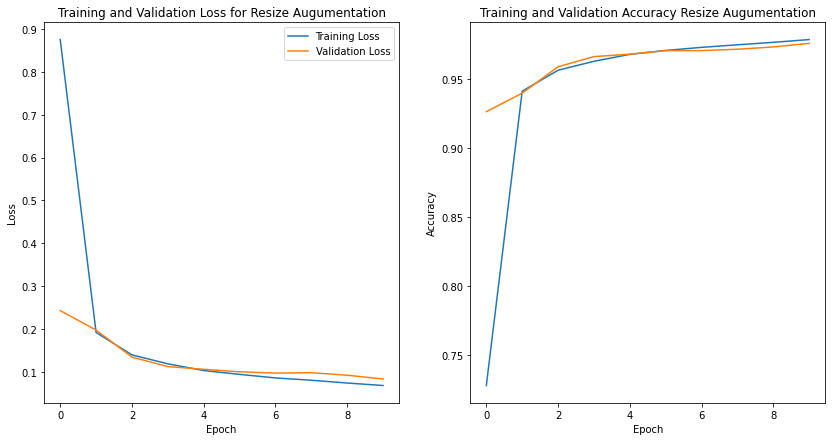

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Resize Augumentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Resize Augumentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

(b) Plot for Flip Augumentation

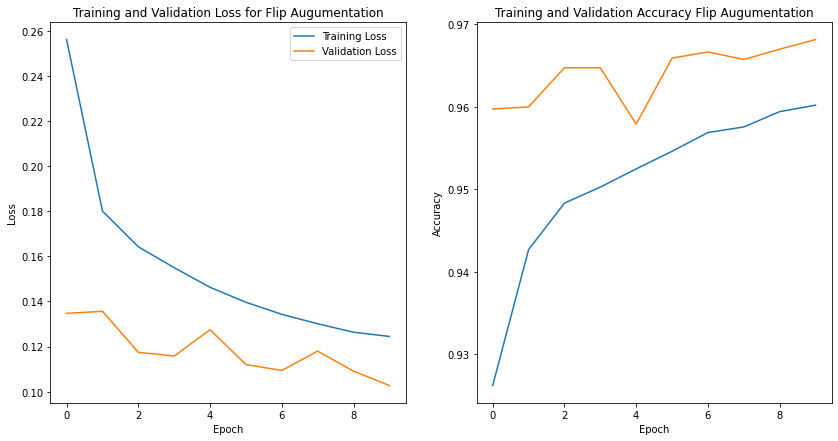

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Flip Augumentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Flip Augumentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

(c) PLot for Rotatation Augumentation

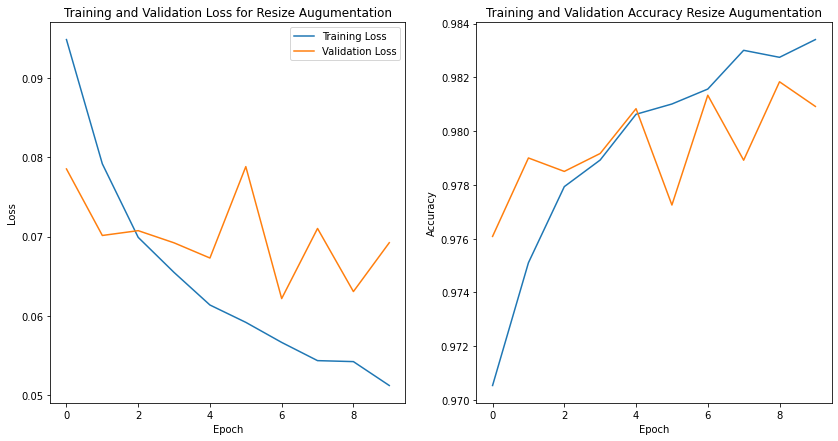

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Resize Augumentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Resize Augumentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

(d) Plot for Gaussian Noise Augumentation

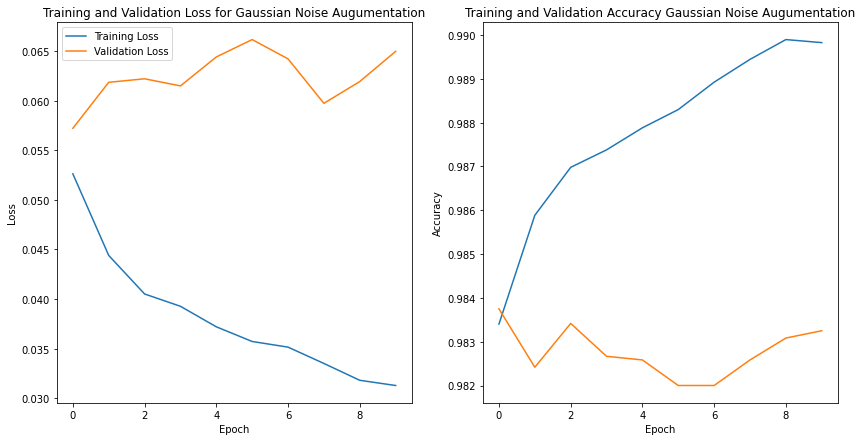

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_4.history['loss'], label='Training Loss')
plt.plot(history_4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Gaussian Noise Augumentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_4.history['accuracy'], label='Training Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Gaussian Noise Augumentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

(e) Plot for All Augumentattions at once

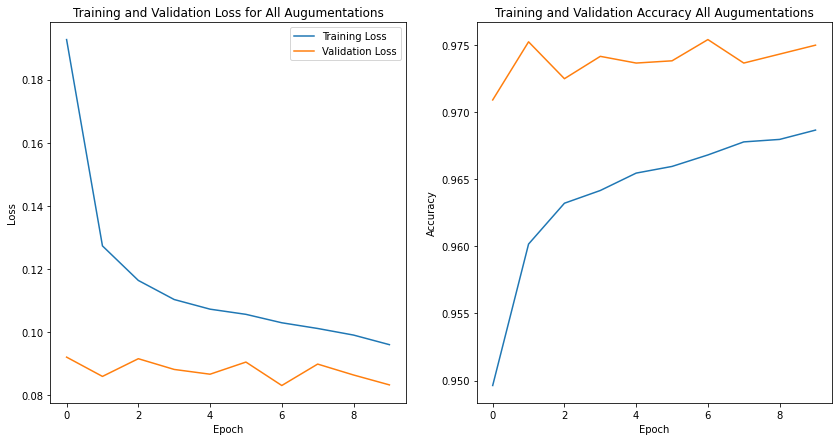

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_5.history['loss'], label='Training Loss')
plt.plot(history_5.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for All Augumentations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_5.history['accuracy'], label='Training Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy All Augumentations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()